# Курсовая работа

Выполнил студент группы М8О-114СВ-24 Ивченко Анна

# Bank Transaction Dataset for Fraud Detection

### Этот набор данных дает подробное представление о транзакционном поведении и моделях финансовой активности

Key Features:

* TransactionID: Уникальный буквенно-цифровой идентификатор для каждой транзакции.  
* AccountID: Уникальный идентификатор для каждого аккаунта, с несколькими транзакциями на аккаунт.  
* TransactionAmount: Денежная сумма каждой транзакции, варьирующаяся от мелких повседневных расходов до крупных покупок.  
* TransactionDate: Отметка времени каждой транзакции, фиксирующая дату и время.  
* TransactionType: Категориальное поле, указывающее на тип транзакции: 'Credit' (кредит) или 'Debit' (дебет).  
* Location: Географическое местоположение транзакции, представленное названиями городов США.  
* DeviceID: Буквенно-цифровой идентификатор устройств, используемых для выполнения транзакции.  
* IP Address: IPv4-адрес, связанный с транзакцией, с периодическими изменениями для некоторых аккаунтов.  
* MerchantID: Уникальный идентификатор для продавцов, показывающий предпочитаемых и редких продавцов для каждого аккаунта.  
* AccountBalance: Баланс на аккаунте после транзакции, с логической корреляцией в зависимости от типа и суммы транзакции.  
* PreviousTransactionDate: Отметка времени последней транзакции для аккаунта, помогающая рассчитать частоту транзакций.  
* Channel: Канал, через который была выполнена транзакция (например, Online, ATM, Branch).  
* CustomerAge: Возраст владельца аккаунта, с логическими группировками в зависимости от профессии.  
* CustomerOccupation: Профессия владельца аккаунта (например, Doctor, Engineer, Student, Retired), отражающая паттерны доходов.  
* TransactionDuration: Длительность транзакции в секундах, варьирующаяся в зависимости от типа транзакции.  
* LoginAttempts: Количество попыток входа перед транзакцией, с более высокими значениями, указывающими на потенциальные аномалии.

In [2]:
import kagglehub
from torch.utils.data import Dataset, DataLoader

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv('bank_transactions_data.csv')
data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [6]:
data.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [7]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


## Предварительный анализ данных

Распределение сумм транзакций

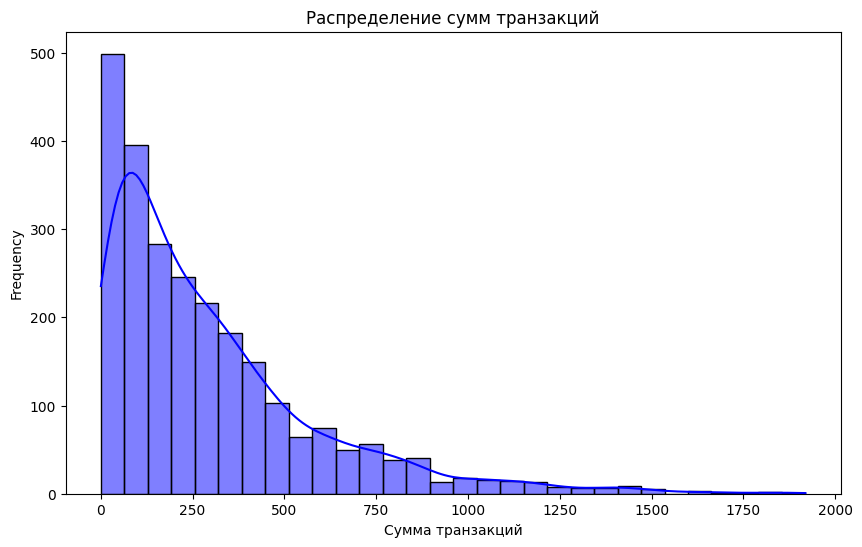

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data['TransactionAmount'], bins=30, kde=True, color='blue')
plt.title('Распределение сумм транзакций')
plt.xlabel('Сумма транзакций')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


## Корреляционная матрица

Correlation Matrix:
                     TransactionAmount  CustomerAge  TransactionDuration  \
TransactionAmount             1.000000    -0.025616             0.004359   
CustomerAge                  -0.025616     1.000000            -0.017936   
TransactionDuration           0.004359    -0.017936             1.000000   
LoginAttempts                -0.008445     0.007653             0.032639   
AccountBalance               -0.025165     0.319942             0.005577   

                     LoginAttempts  AccountBalance  
TransactionAmount        -0.008445       -0.025165  
CustomerAge               0.007653        0.319942  
TransactionDuration       0.032639        0.005577  
LoginAttempts             1.000000        0.014999  
AccountBalance            0.014999        1.000000  


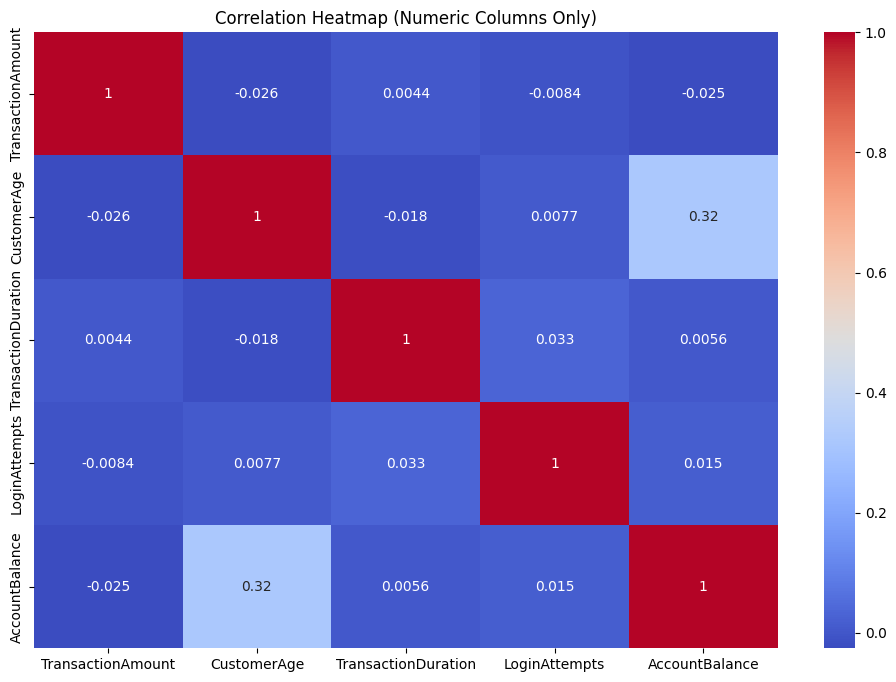

In [15]:
#correlation matrix for numeric data only
numeric_data = data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(12, 8))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()

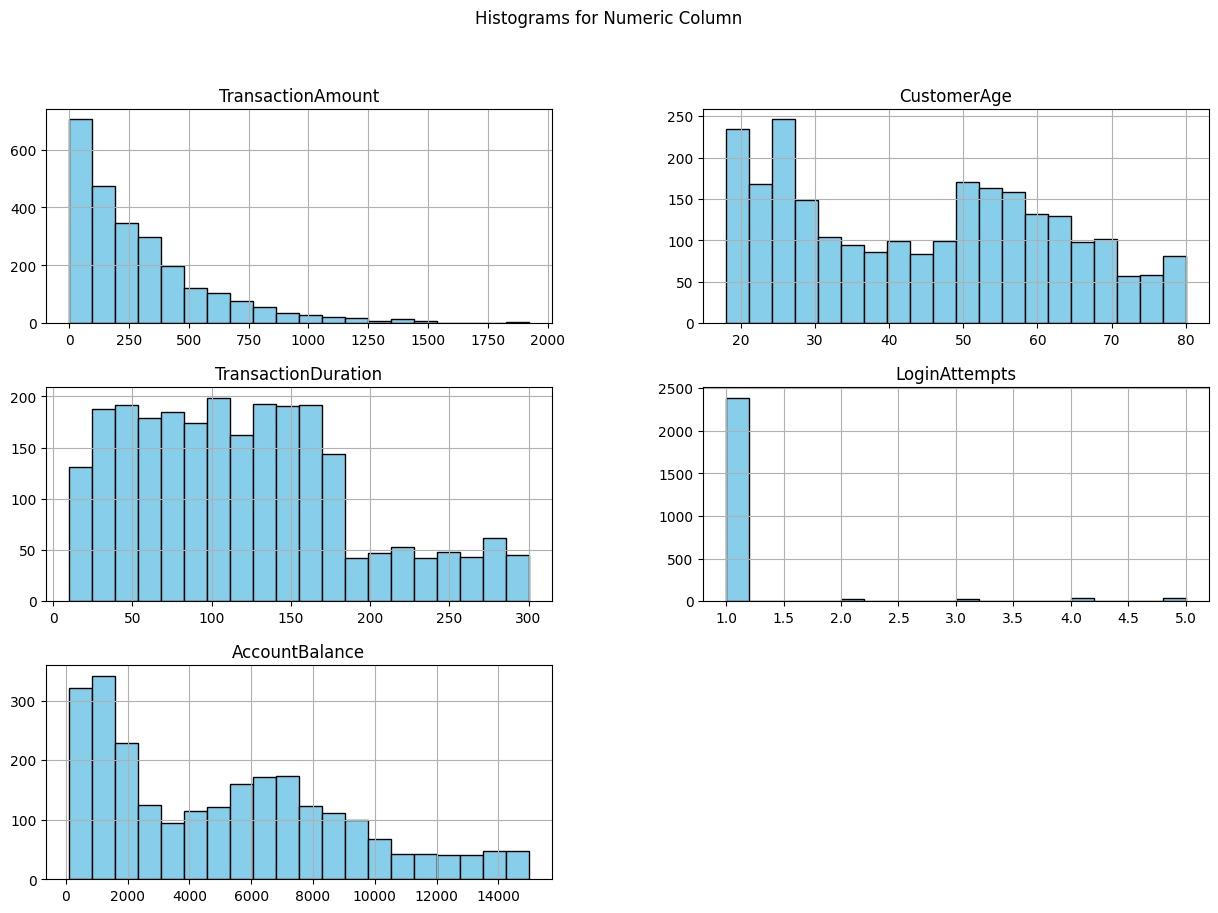

In [16]:
# Гистограммы для числовых столбцов
numeric_data.hist(figsize=(15, 10), bins=20, edgecolor='black', color='skyblue')
plt.suptitle('Histograms for Numeric Column')
plt.show()

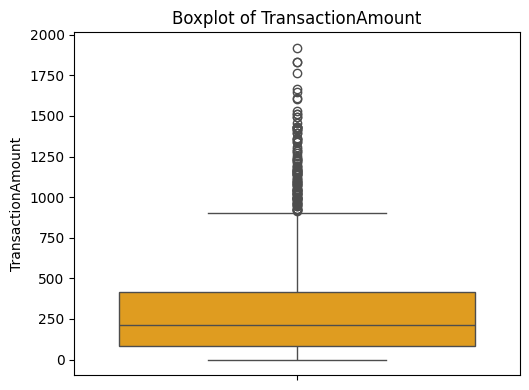

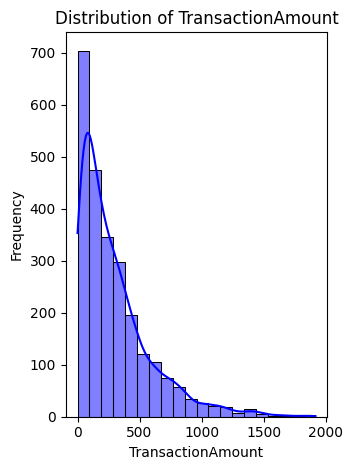

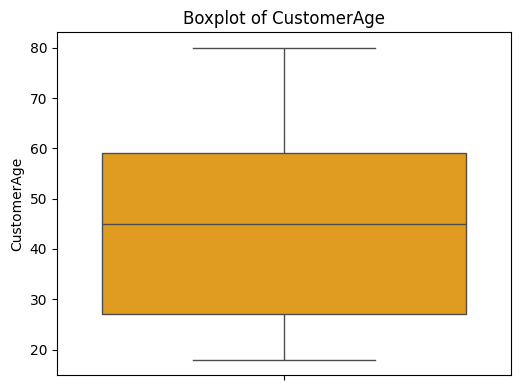

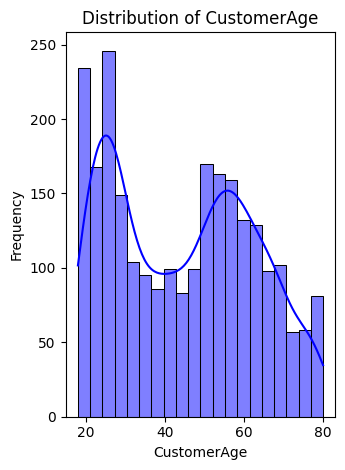

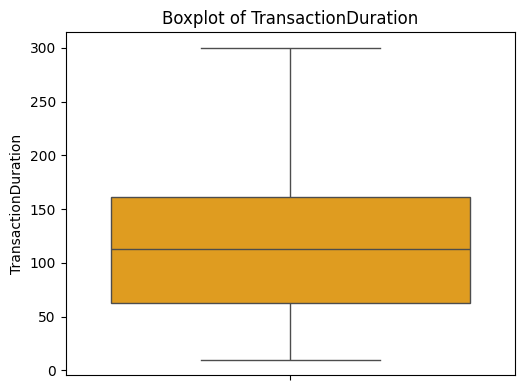

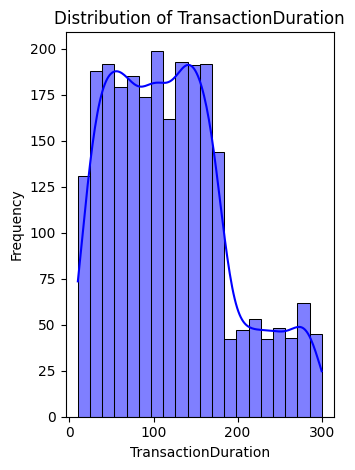

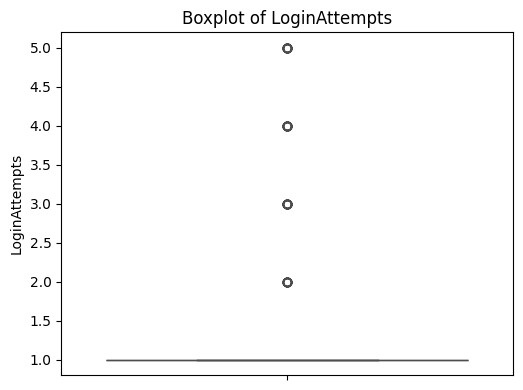

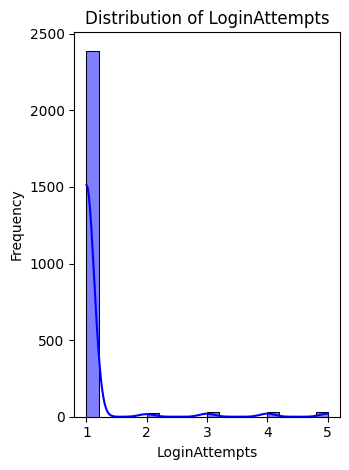

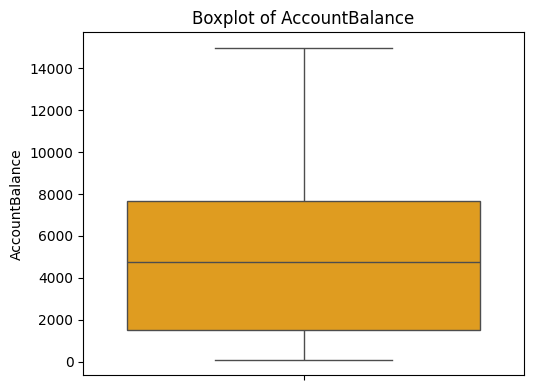

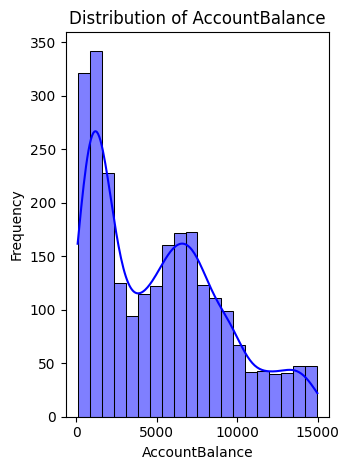

In [17]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns


# For numeric columns: Histograms and Boxplots
for col in numeric_cols:
    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True, bins=20, color='blue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

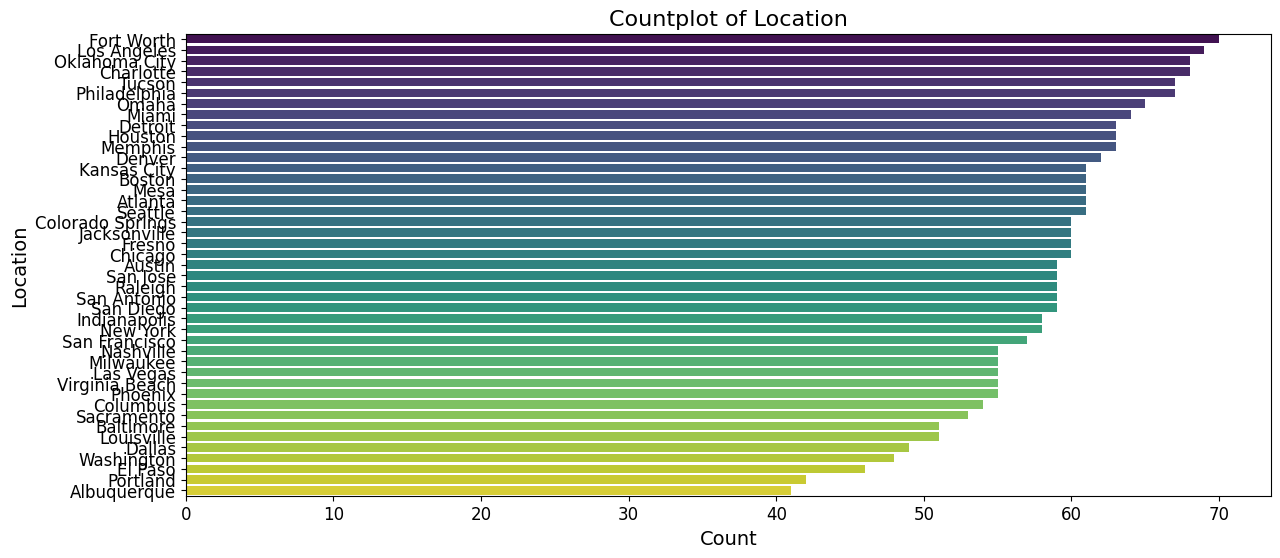

In [38]:
# Для категориальных столбцов
# График подсчета для "местоположения"
plt.figure(figsize=(14, 6))
sns.countplot(y=data['Location'], order=data['Location'].value_counts().index, palette='viridis')
plt.title('Countplot of Location', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Location', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

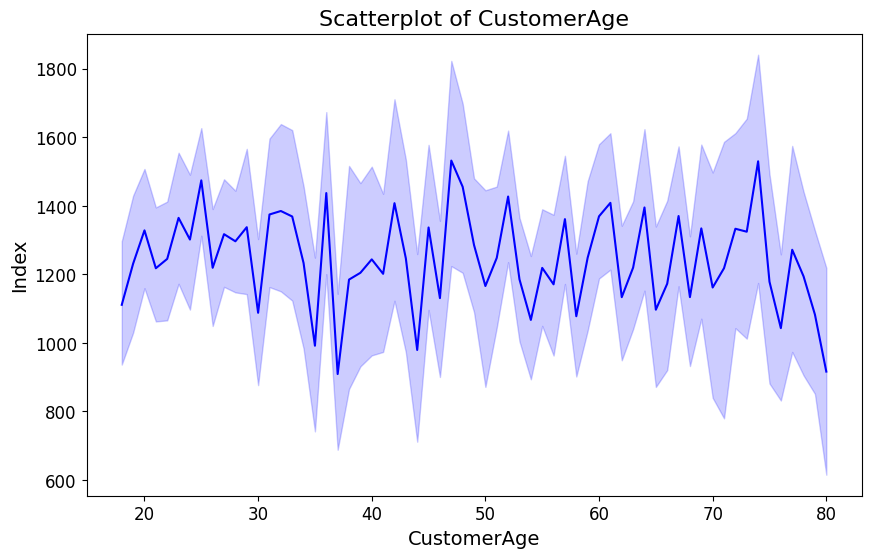

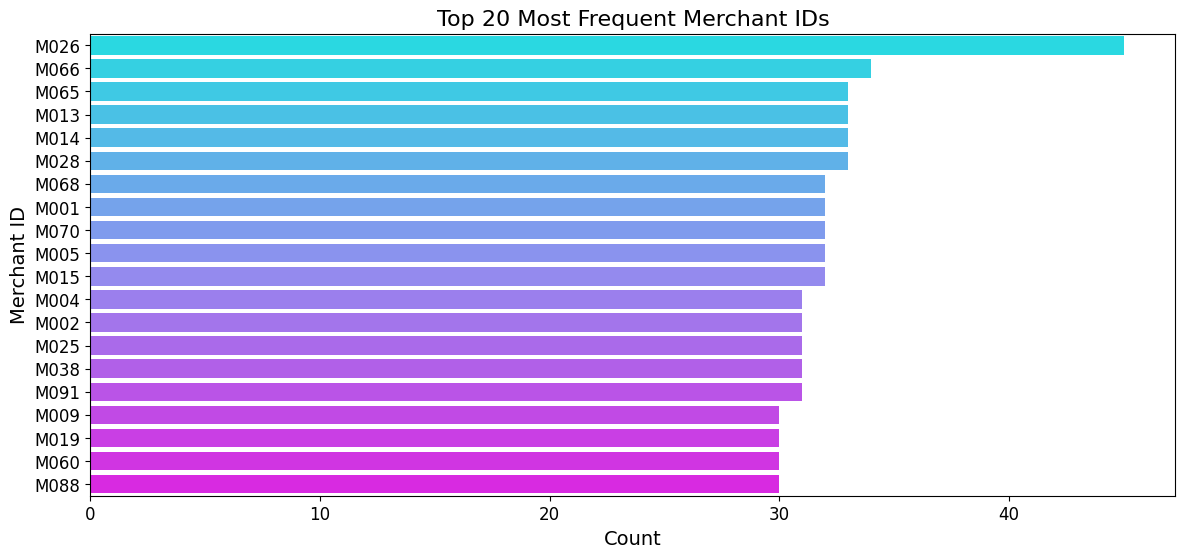

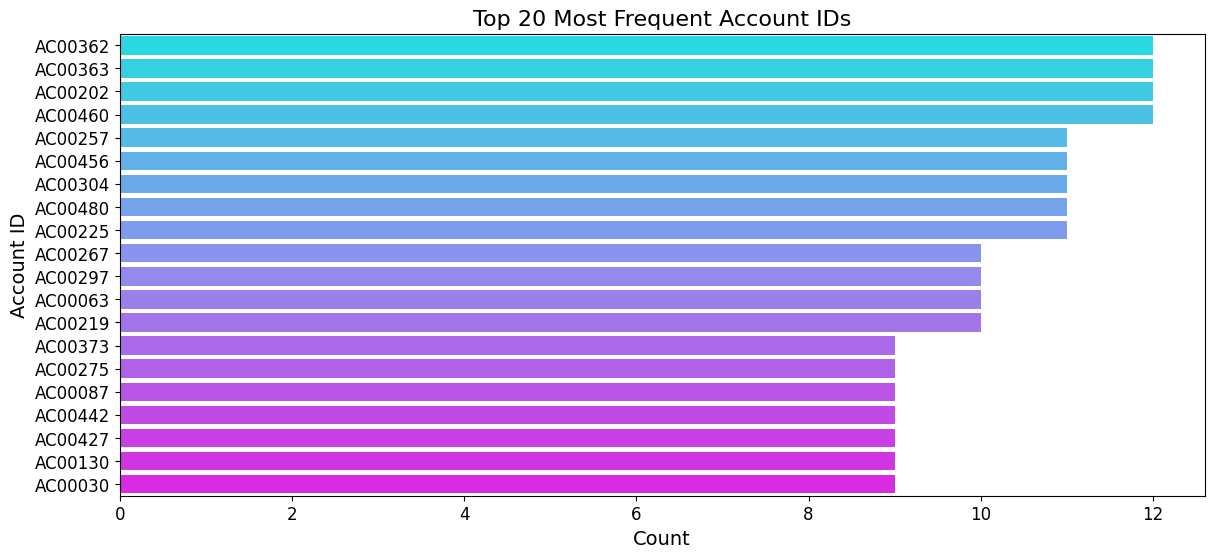

In [18]:
# Диаграмма рассеяния "CustomerAge"
plt.figure(figsize=(10, 6))
sns.lineplot(y=data.index, x=data['CustomerAge'], color='blue')
plt.title('Scatterplot of CustomerAge', fontsize=16)
plt.ylabel('Index', fontsize=14)
plt.xlabel('CustomerAge', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

# Частота появления 20 наиболее активных продавцов (MerchantID)
top_20_merchants = data['MerchantID'].value_counts().head(20).index
plt.figure(figsize=(14, 6))
sns.countplot(y=data[data['MerchantID'].isin(top_20_merchants)]['MerchantID'], order=top_20_merchants, palette='cool')
plt.title('Top 20 Most Frequent Merchant IDs', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Merchant ID', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Частота появления 20 наиболее активных аккаунтов (AccountID):
top_20_accounts = data['AccountID'].value_counts().head(20).index
plt.figure(figsize=(14, 6))
sns.countplot(y=data[data['AccountID'].isin(top_20_accounts)]['AccountID'], order=top_20_accounts, palette='cool')
plt.title('Top 20 Most Frequent Account IDs', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Account ID', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Анализ времени транзакции на предмет аномалий

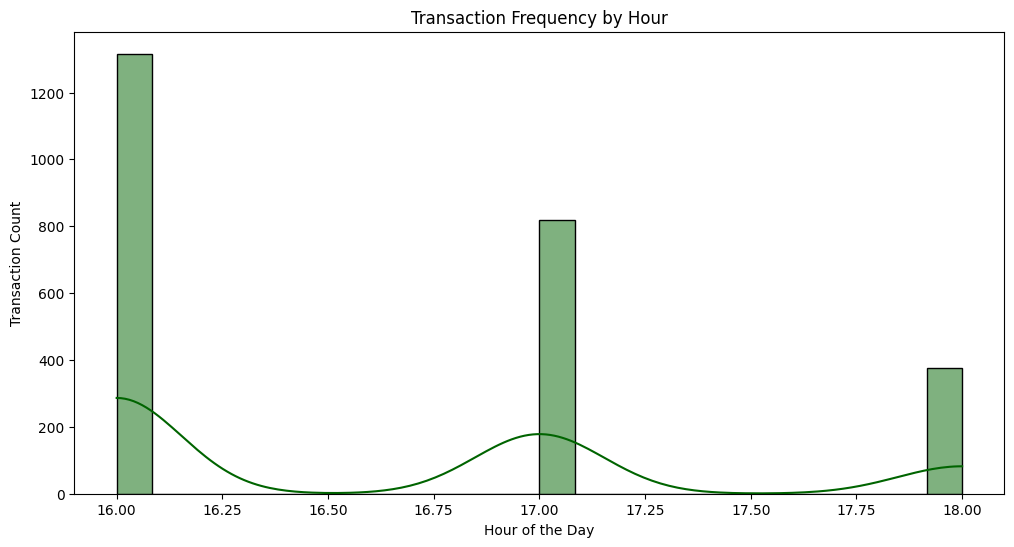

In [19]:
# Убедимся, что столбец TransactionDate имеет тип datetime
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

# Извлекаем час
data['Hour'] = data['TransactionDate'].dt.hour

# Создаем график
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Hour', kde=True, bins=24, color='darkgreen')
plt.title("Transaction Frequency by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Transaction Count")
plt.show()

## Методы Обнаружения мошенничества

In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Preprocessing: Handle datetime columns
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'],format='%Y-%m-%d %H:%M:%S')
data['PreviousTransactionDate'] = pd.to_datetime(data['PreviousTransactionDate'],format='%Y-%m-%d %H:%M:%S')
data['TimeSinceLastTransaction'] = (data['TransactionDate'] - data['PreviousTransactionDate']).dt.total_seconds()

# Identify numeric and categorical columns
numeric_cols = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge', 'TimeSinceLastTransaction']
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

# Normalize numeric columns
scaler = StandardScaler()
numeric_scaled = pd.DataFrame(scaler.fit_transform(data[numeric_cols]), columns=numeric_cols)

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Avoid dummy variable trap
categorical_encoded = pd.DataFrame(encoder.fit_transform(data[categorical_cols]), 
                                   columns=encoder.get_feature_names_out(categorical_cols))

# Combine preprocessed data
processed_data = pd.concat([numeric_scaled, categorical_encoded], axis=1)

# Descriptive Statistics
print("Descriptive Statistics:")
print(data[numeric_cols].describe())

# Initialize Fraud column
data['Fraud'] = False

Descriptive Statistics:
       TransactionAmount  TransactionDuration  LoginAttempts  AccountBalance  \
count        2512.000000          2512.000000    2512.000000     2512.000000   
mean          297.593778           119.643312       1.124602     5114.302966   
std           291.946243            69.963757       0.602662     3900.942499   
min             0.260000            10.000000       1.000000      101.250000   
25%            81.885000            63.000000       1.000000     1504.370000   
50%           211.140000           112.500000       1.000000     4735.510000   
75%           414.527500           161.000000       1.000000     7678.820000   
max          1919.110000           300.000000       5.000000    14977.990000   

       CustomerAge  TimeSinceLastTransaction  
count  2512.000000              2.512000e+03  
mean     44.673965             -4.211863e+07  
std      17.792198              9.191205e+06  
min      18.000000             -5.803267e+07  
25%      27.000000  

##  K-Means

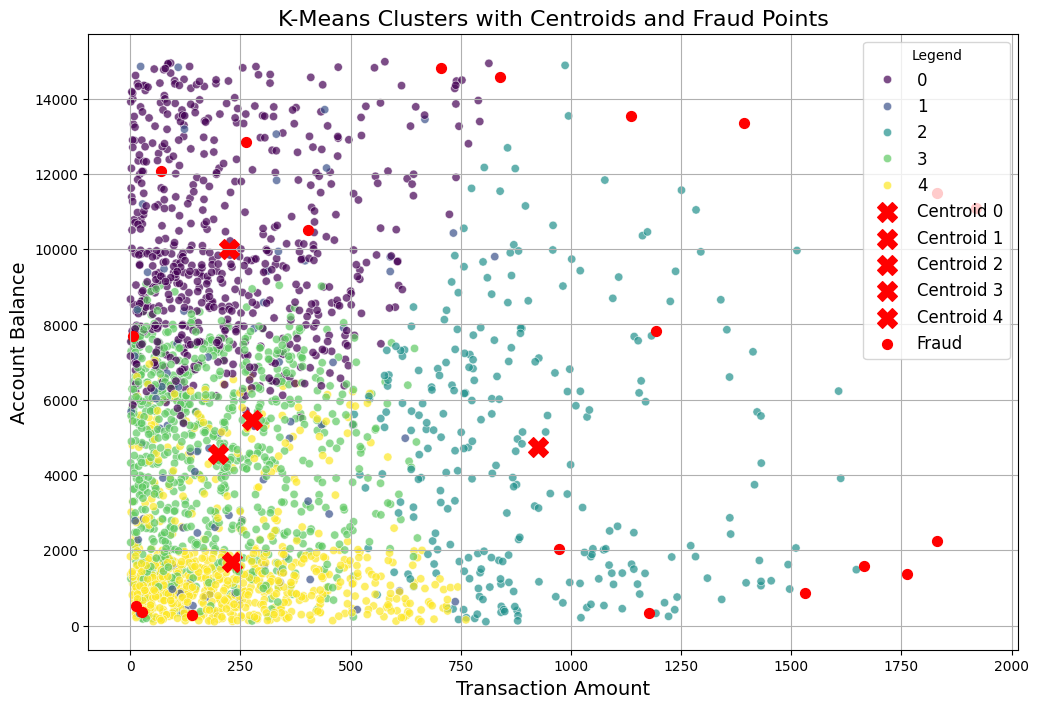

In [27]:
from sklearn.cluster import KMeans
# Определение числовых столбцов
numeric_cols = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']

# Масштабирование данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_cols])

# Кластеризация с использованием K-Means
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Расчет расстояний до центроидов
centroids = kmeans.cluster_centers_
distances = np.linalg.norm(scaled_data - centroids[data['Cluster']], axis=1)
data['Distance'] = distances

# Определение порога для выявления аномалий
threshold = distances.mean() + 3 * distances.std()
data['Fraud'] = distances > threshold

# Визуализация кластеров и аномалий
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=data['TransactionAmount'],
    y=data['AccountBalance'],
    hue=data['Cluster'],
    palette='viridis',
    alpha=0.7,
    legend='full'
)

# Добавление центроидов на график
centroids_original = scaler.inverse_transform(centroids)
for i, centroid in enumerate(centroids_original):
    plt.scatter(
        centroid[numeric_cols.index('TransactionAmount')],
        centroid[numeric_cols.index('AccountBalance')],
        color='red',
        marker='X',
        s=200,
        label=f'Centroid {i}'
    )

# Выделение аномалий
fraud_points = data[data['Fraud']]
plt.scatter(
    fraud_points['TransactionAmount'],
    fraud_points['AccountBalance'],
    color='red',
    marker='o',
    s=50,
    label='Fraud'
)

plt.title('K-Means Clusters with Centroids and Fraud Points', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)
plt.legend(title='Legend', fontsize=12)
plt.grid(True)
plt.show()

## Z-Score

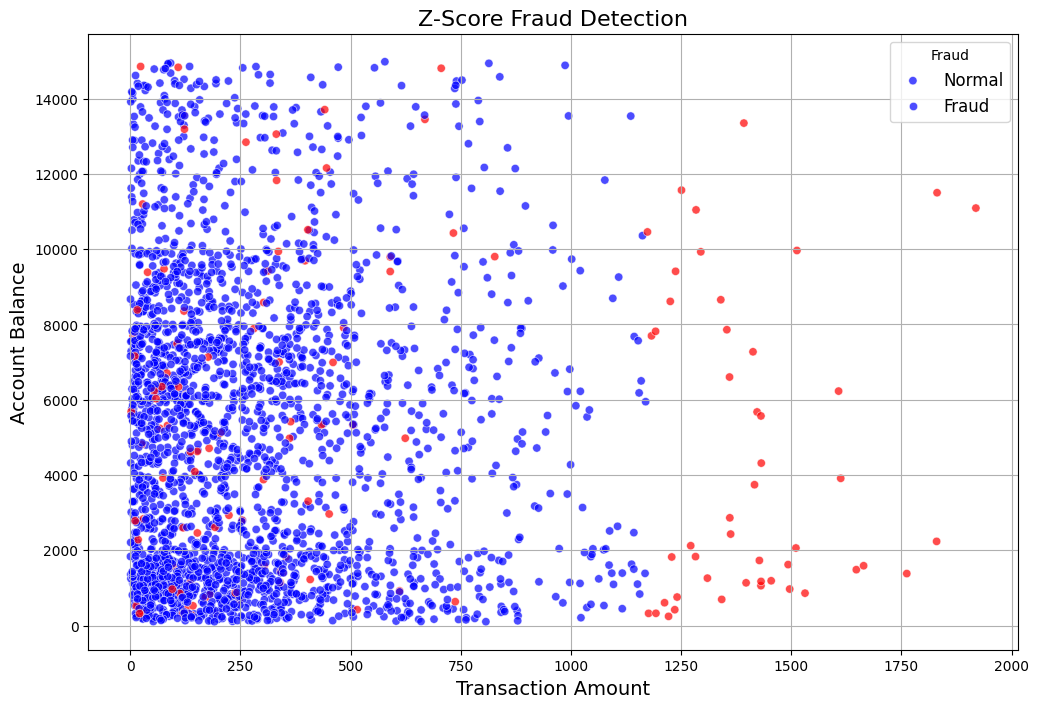

Total Fraudulent Transactions Detected by Z-Score Analysis: 140


In [30]:
from scipy.stats import zscore

# Определяем числовые столбцы, которые будут использоваться для анализа
numeric_cols = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge']

# Вычисляем Z-оценки для числовых столбцов
z_scores = np.abs(zscore(data[numeric_cols]))  # Вычисляем абсолютные значения Z-оценок

# Помечаем транзакции, где хотя бы одна Z-оценка превышает порог |z| > 3
data['ZScore_Fraud'] = (z_scores > 3).any(axis=1)  # Флаг для мошеннических транзакций

# Извлекаем мошеннические транзакции, выявленные с помощью Z-оценок
zscore_fraud_points = data[data['ZScore_Fraud']]

# Подсчитываем общее количество мошеннических транзакций
total_zscore_fraud_points = data['ZScore_Fraud'].sum()

# Формируем сводку по мошенническим транзакциям
zscore_fraud_points_summary = zscore_fraud_points[numeric_cols + ['ZScore_Fraud']]

# Добавляем флаг мошенничества в столбец 'Fraud'
data['Fraud'] |= data['ZScore_Fraud']  # Объединяем флаги мошенничества

# Создаем scatterplot для визуализации результатов Z-Score Fraud Detection
plt.figure(figsize=(12, 8))  # Устанавливаем размер графика
sns.scatterplot(
    x=data['TransactionAmount'],  # Ось X: сумма транзакции
    y=data['AccountBalance'],    # Ось Y: баланс счета
    hue=data['ZScore_Fraud'],    # Цвет точек: мошеннические или нет
    palette={True: 'red', False: 'blue'},  # Красный цвет для мошеннических, синий для нормальных
    alpha=0.7  # Прозрачность точек
)
plt.title('Z-Score Fraud Detection', fontsize=16)  # Заголовок графика
plt.xlabel('Transaction Amount', fontsize=14)  # Подпись оси X
plt.ylabel('Account Balance', fontsize=14)  # Подпись оси Y
plt.legend(title='Fraud', labels=['Normal', 'Fraud'], fontsize=12)  # Легенда с измененными подписями
plt.grid(True)  # Включаем сетку
plt.show()  # Отображаем график

# Выводим сводку по результатам анализа
print(f"Total Fraudulent Transactions Detected by Z-Score Analysis: {total_zscore_fraud_points}")

## Логистическая регрессия

Отчет о классификации:
              precision    recall  f1-score   support

       False       0.99      1.00      1.00       714
        True       1.00      0.88      0.93        40

    accuracy                           0.99       754
   macro avg       1.00      0.94      0.96       754
weighted avg       0.99      0.99      0.99       754



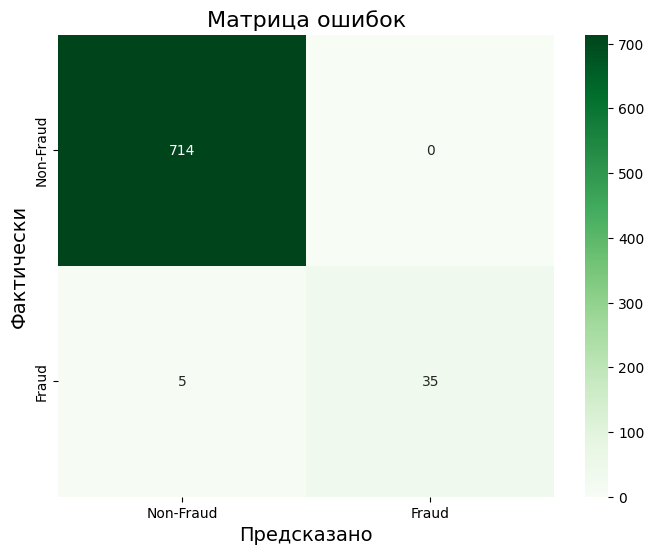

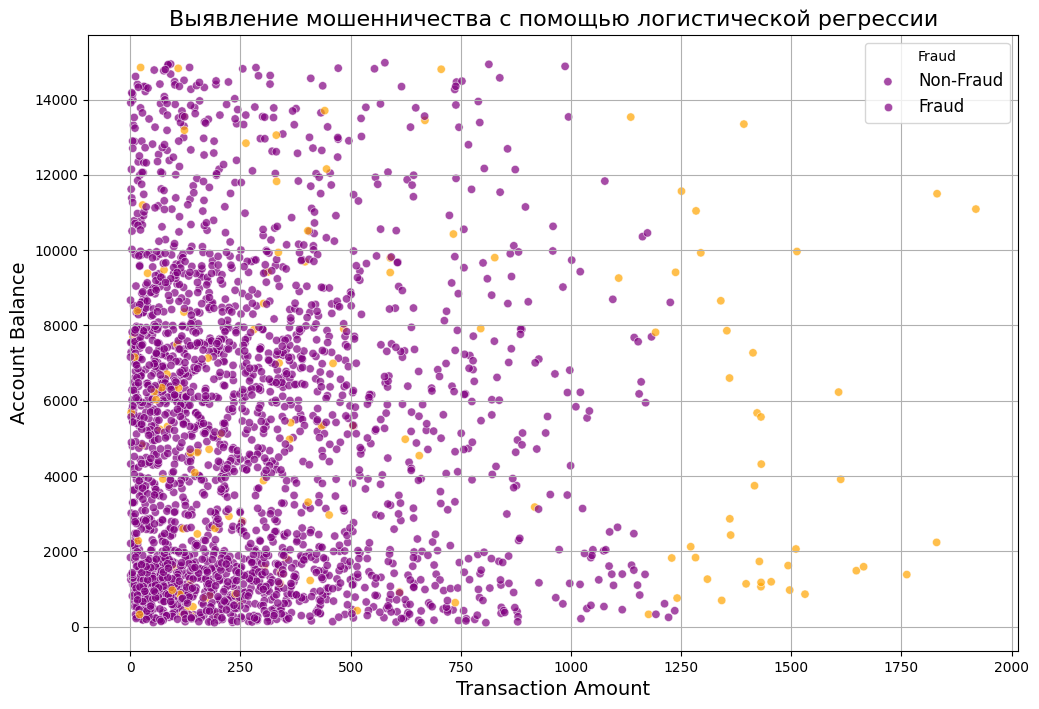

Общее количество мошеннических транзакций, выявленных логистической регрессией: 134


In [31]:
# Определяем релевантные столбцы для логистической регрессии
features = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge', 'TimeSinceLastTransaction']
target = 'Fraud'  # Целевая переменная (мошенничество)

# Подготавливаем датасет
X = data[features]  # Признаки
y = data[target]    # Целевая переменная

# Стандартизируем признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Масштабируем данные

# Разделяем датасет на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Обучаем модель логистической регрессии
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)  # Обучение модели

# Предсказываем мошеннические транзакции на тестовой выборке
y_pred = log_reg.predict(X_test)

# Оцениваем производительность модели
print("Отчет о классификации:")
print(classification_report(y_test, y_pred))  # Выводим отчет о классификации

# Матрица ошибок (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Матрица ошибок', fontsize=16)
plt.xlabel('Предсказано', fontsize=14)
plt.ylabel('Фактически', fontsize=14)
plt.show()

# Добавляем предсказания в датасет
data['LogReg_Fraud'] = log_reg.predict(X_scaled)  # Предсказания модели
data['Fraud'] |= data['LogReg_Fraud']  # Обновляем столбец 'Fraud'

# Визуализируем мошеннические и не мошеннические транзакции
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=data['TransactionAmount'],  # Ось X: сумма транзакции
    y=data['AccountBalance'],    # Ось Y: баланс счета
    hue=data['LogReg_Fraud'],    # Цвет точек: предсказания модели
    palette={1: 'orange', 0: 'purple'},  # Цвета для мошеннических и не мошеннических транзакций
    alpha=0.7  # Прозрачность точек
)
plt.title('Выявление мошенничества с помощью логистической регрессии', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'], fontsize=12)  # Легенда
plt.grid(True)  # Включаем сетку
plt.show()

# Сохраняем мошеннические транзакции, выявленные логистической регрессией
log_reg_fraud_points = data[data['LogReg_Fraud'] == 1]

# Выводим сводку по результатам
total_log_reg_fraud_points = log_reg_fraud_points.shape[0]
print(f"Общее количество мошеннических транзакций, выявленных логистической регрессией: {total_log_reg_fraud_points}")

## Таблица угроз

In [34]:
# Пример: создание столбца 'ThreatLevel' на основе нескольких признаков
data['Threat_Level'] = (data['LoginAttempts'] * 2 + data['TransactionDuration'] / 10).astype(int)

In [37]:
def plot_threat_chart_and_save_suspicious(data, threat_level_col='ThreatLevel', account_id_col='AccountID', transaction_id_col='TransactionID'):
    """
    Построение графика угроз для 20 наиболее подозрительных транзакций и сохранение подозрительных транзакций в CSV-файл.

    Параметры:
        data (pd.DataFrame): Датасет, содержащий данные о транзакциях.
        threat_level_col (str): Название столбца с уровнем угрозы.
        account_id_col (str): Название столбца с ID аккаунта.
        transaction_id_col (str): Название столбца с ID транзакции.
    """
    
    # Выделяем подозрительные транзакции (уровень угрозы > 3)
    suspicious_transactions = data[data[threat_level_col] > 3]
    
    # Выбираем топ-20 подозрительных транзакций
    top_20_suspicious = suspicious_transactions.sort_values(by=threat_level_col, ascending=False).head(20)
    
    # Построение графика угроз
    plt.figure(figsize=(12, 6))
    sns.barplot(x=transaction_id_col, y=threat_level_col, data=top_20_suspicious, palette='Reds_r')
    plt.title('Топ-20 потенциально мошеннических транзакций (График угроз)', fontsize=16)
    plt.xlabel('ID транзакции', fontsize=12)
    plt.ylabel('Уровень угрозы', fontsize=12)
    plt.xticks(rotation=45, ha='right')  # Поворот подписей по оси X для удобства чтения
    plt.tight_layout()  # Автоматическое выравнивание элементов графика
    plt.show()

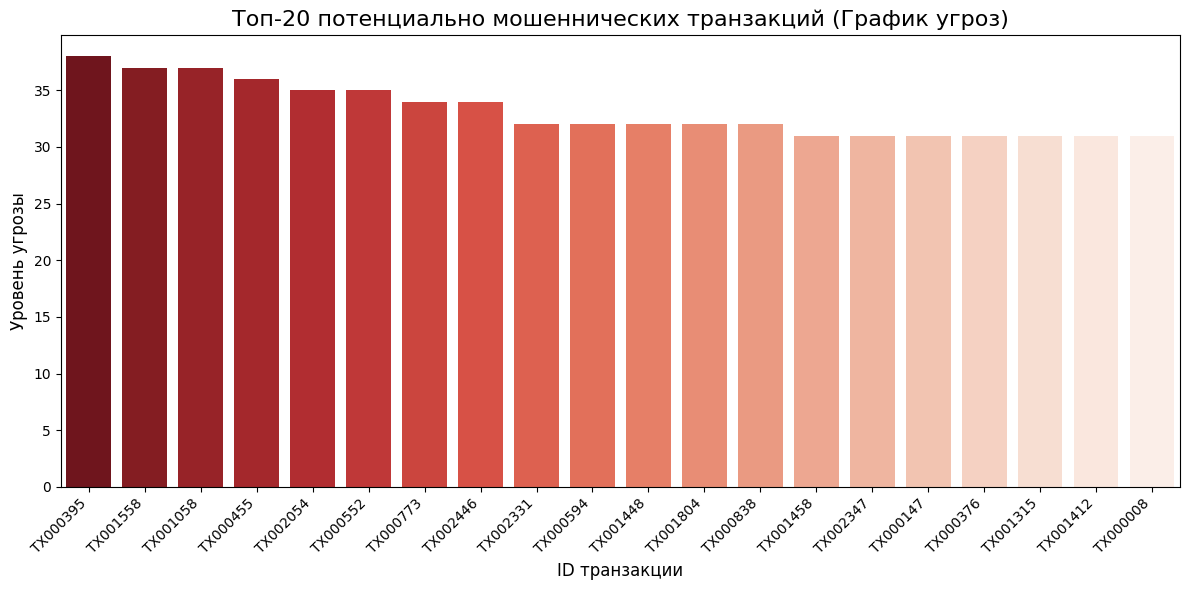

In [38]:
plot_threat_chart_and_save_suspicious(data, threat_level_col='Threat_Level', account_id_col='AccountID', transaction_id_col='TransactionID')